In [2]:
#stylistic preferences 
import matplotlib.style
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('dark_background')

# Overviews and Introductory remarks 

The citations of the references below have been enclosed in squared brackets "[ ]" througout the text.


References: 

1. Nick McCullum, Codeacademy - Algorithmic Trading Using Python - Full Course (https://www.youtube.com/watch?v=xfzGZB4HhEE)<br>
<br>
2. Rishi K. Narang, Inside the Black Box: A Simple Guide to Quantitative and High-Frequency Trading: 846 (Wiley Finance) - (https://www.amazon.co.uk/Inside-Black-Box-Quantitative-Frequency/dp/1118362411)

Quantitative trading models normally have the following elements: [2]

1. An Alpha Model - This component predicts/forecasts how the traded instrument will behave in the future.<br> 
<br>
2. Risk Model - The risk model attempts to limit the amount of money the strategy allocates to investments where returns might be unlikely and where losses may occur.<br> 
<br>
3. Transaction Cost Model - Weighs the cost of trades required vs. the returns.<br> 
<br>
4. Portfolio contruction model - All of the above go into a portfolio contruction model. This model balances the trade-offs between the expected returns, risks and the transaction costs to construct a target portfolio.<br>  
<br>
5. Execution Model - Differences between the target and current portfolio then decide the trades that need to be executed. The execution model (based on an algorithm of its own) executes these trades in an efficient and low cost manner. 


These elements seem pretty complex, so let's begin with a simpler and more introductory approach to quantitative trading. To run a quantitative trading strategy we must proceed in the following manner. - [1]

1. We must first collect data.<br> 
<br> 
2. Then a hypothesis must be constructed that attempts to profit from theorized behaviours of the data (this is to be our trading strategy).<br> 
<br> 
3. Backtesting must be done to validate this hypothesis. (Test on data that go as far back as possible and across as many markets as possible).<br>
<br>
4. Implement this strategy.

# Data Access - Getting a feel for commodity futures

In [4]:
import yfinance as yfin
import pandas as pd

In [5]:
# lets try and look at crude oil prices over the past 6 months 
corn_futures = yfin.Ticker("ZC=F")

one_year_corn_futures_history = corn_futures.history(period="1y")

Text(0, 0.5, 'Time')

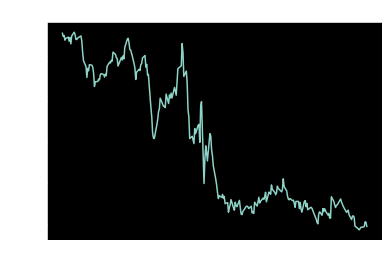

In [6]:
plt.plot(one_year_corn_futures_history.index.values, one_year_corn_futures_history['Close'].values)
plt.title('Corn Futures (12 Mo.)')
plt.xlabel('Closing Price')
plt.ylabel('Time')

## Why have corn futures fallen as they have ?

First ideas are to look at if there have been similar lows in other years (simmilar drops in the same months in past years would be a solid indicator). Then, if it is periodic, to look at any reports that come out at that time or any policy changes that have come into effect. Secondly, it might be fruitfull to look at corn consumers and how geographical distributions of corn production/consumptions have changed (for longer term studies we could use geospatial data !!).

Text(0, 0.5, 'Time')

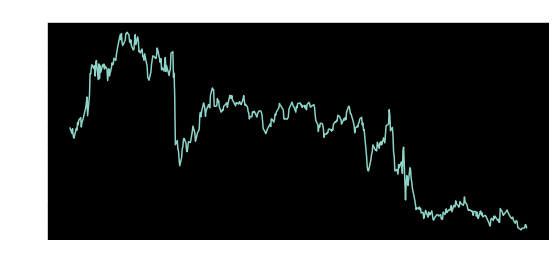

In [7]:
two_year_corn_futures_history = corn_futures.history(period="2y")
plt.figure(figsize=(9,4))
plt.plot(two_year_corn_futures_history.index.values, two_year_corn_futures_history['Close'].values)
plt.title('Corn Futures (2y)')
plt.xlabel('Closing Price')
plt.ylabel('Time')


There does seem to be a sharp drop, something particular seems to occur in july.

Who produces corn ? 

The 2023 numbers from https://www.statista.com/statistics/254294/distribution-of-global-corn-production-by-country-2012/ (statista) show the United States being the largest producer with China coming in at a close second. Patterns in the traded prices are thus probably greatly influenced by the crop years in the USA. 

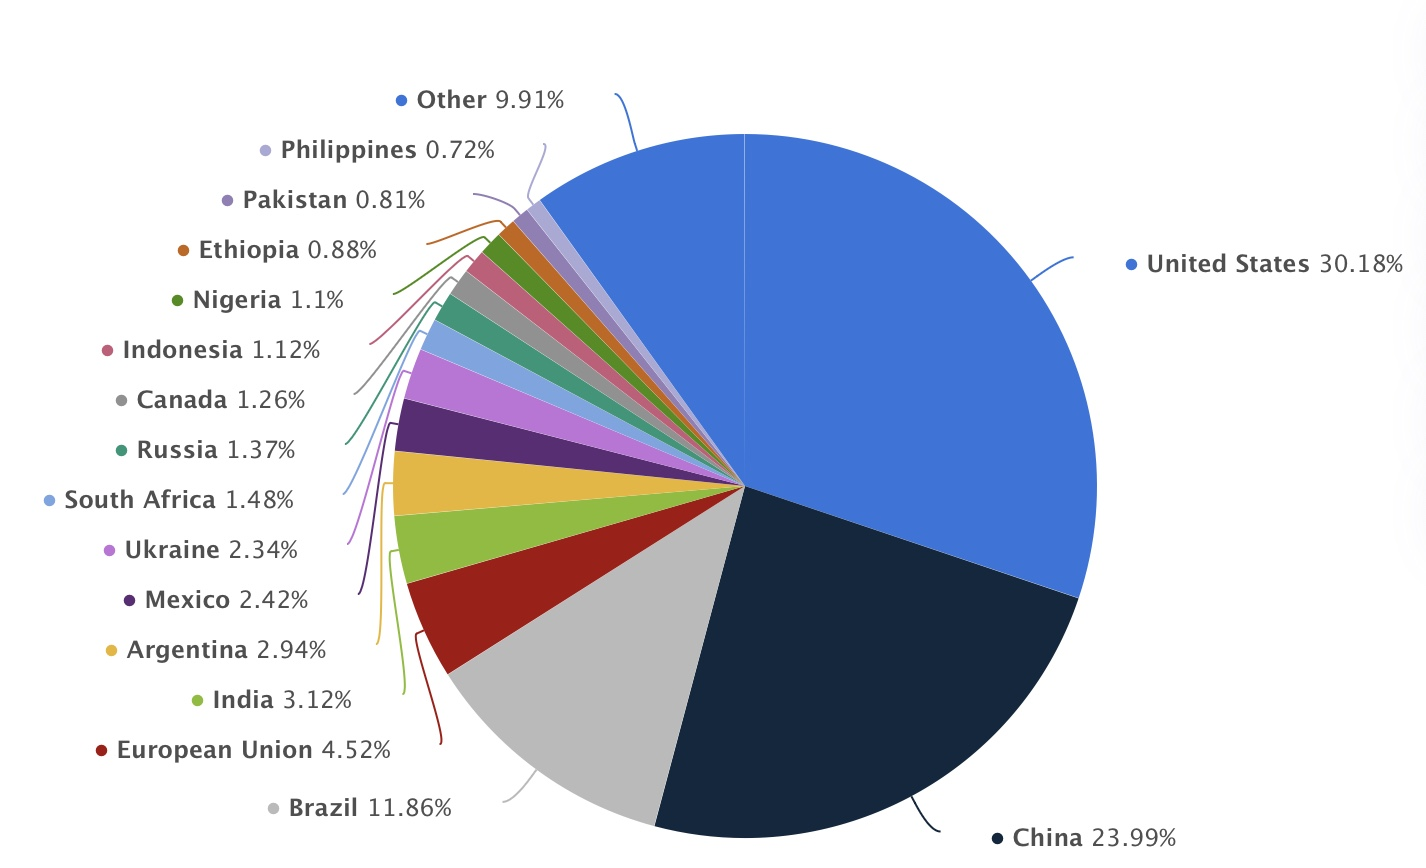

Crop year for corn in the USA as per the USDA's website (https://ipad.fas.usda.gov/rssiws/al/crop_calendar/us.aspx) runs from april to december. with planting season running from apr-Jun and harvest season running from sept-nov. 

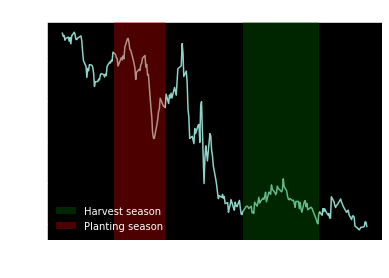

In [35]:
from datetime import datetime
sep_date_1 = datetime.strptime('2023-09-01', '%Y-%m-%d')
dec_date_1 = datetime.strptime('2023-12-01', '%Y-%m-%d')

apr_date_1 = datetime.strptime('2023-04-01', '%Y-%m-%d')
jun_date_1 = datetime.strptime('2023-06-01', '%Y-%m-%d')
#harvest season
plt.axvspan(sep_date_1, dec_date_1, facecolor='g', alpha=0.3,zorder=3,label='Harvest season')
plt.axvspan(apr_date_1, jun_date_1, facecolor='r', alpha=0.3,zorder=3,label='Planting season')
plt.plot(one_year_corn_futures_history.index.values, one_year_corn_futures_history['Close'].values)
plt.title('Corn Futures (12 Mo.)')
plt.xlabel('Closing Price')
plt.ylabel('Time')
plt.legend(frameon=False,loc="lower left")

Options expire in the following months;-

February 23, 2024
March 22, 2024
April 26, 2024
June 21, 2024
August 23, 2024
November 22, 2024


So looks like its just seasonality as described by the CME institute's website (https://www.cmegroup.com/education/courses/introduction-to-grains-and-oilseeds/understanding-seasonality-in-grains.html#)

## Factors that cause the prices of corn futures to drop in july

1. The USDA publishes its world supply and demand estimates in July. If the expected crop size is larger than expected, it can lead to a lower price expectation for the crop options. 

2. Harvest season begins. Abundant supply causes the price to fall.

## How could we have predicted this fall ?